# Let's Practice: Lab5B

In [1]:
#   __  __                   _                   _           
#  |  \/  |                 | |                 (_)          
#  | \  / | __ _  __ _  ___ | |_ _ __ ___  _ __  _  ___ ___  
#  | |\/| |/ _` |/ _` |/ _ \| __| '__/ _ \| '_ \| |/ __/ _ \ 
#  | |  | | (_| | (_| | (_) | |_| | | (_) | | | | | (_| (_) |
#  |_|  |_|\__,_|\__, |\___/ \__|_|  \___/|_| |_|_|\___\___/ 
#                 __/ |                                      
#                |___/                                       
# ─────────────────────────────────────────────────────────────────────────────
#                                                                           
# Script Name : Lab5B.py
# Author      : Dilan Castañeda                                             
# Created On  : September 26, 2024                                           
# Last Update : September 26, 2024                                         
# Version     : 1.0.0                                          
# Description : Correlation and Heatmaps
# ─────────────────────────────────────────────────────────────────────────────

## Import Libraries

In [2]:
# 1) Import pandas and numpy libraries
import pandas as pd
import numpy as np
import fitter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# 1. Load the mpg dataset using load_dataset function from seabor
mpg_data = sns.load_dataset('mpg')
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# 2)Create a correlation matrix using the pandas function corr( )
# Select only numeric columns for correlation matrix
numeric_cols = mpg_data.select_dtypes(include='number')

# Create a correlation matrix for the numeric columns
corr_matrix = numeric_cols.corr()

# Display the correlation matrix
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [5]:
# 3)What is the meaning of the correlation scores? What is the default correlation method? How is it obtained? What other correlation methods can be selected?


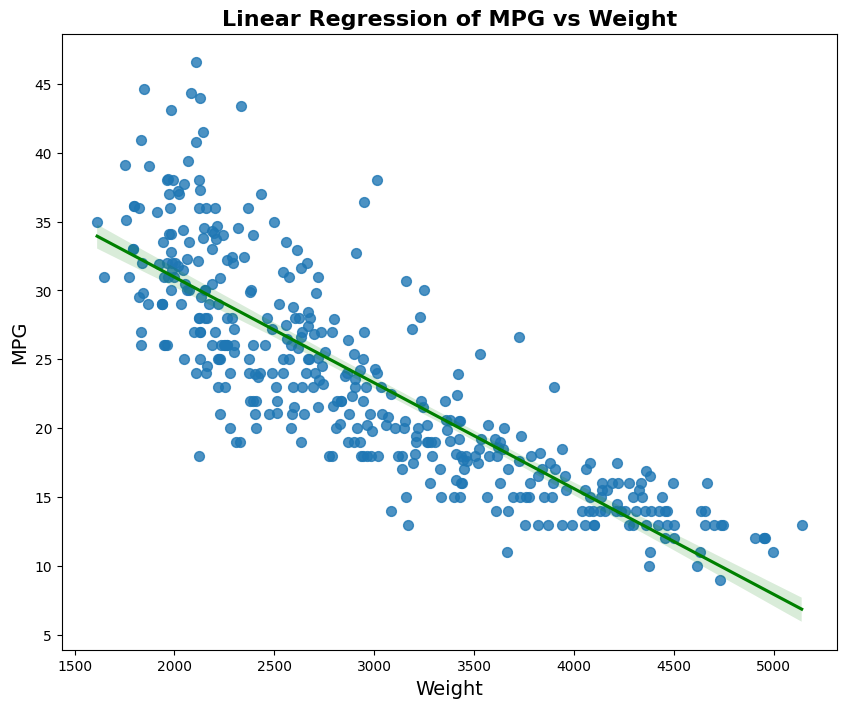

In [6]:
# 4)  Verify a pairwise correlation coefficient obtained by plotting the two variables.
# Scatter plot of mpg vs weight with regression line
plt.figure(figsize=(10, 8))

sns.regplot(x='weight', y='mpg', data=mpg_data, scatter_kws={'s': 50}, line_kws={"color": "g"})

# Configuration of figure
plt.title("Linear Regression of MPG vs Weight", fontsize=16, fontweight='bold')
plt.xlabel("Weight", fontsize=14)
plt.ylabel("MPG", fontsize=14)

# Show graph
plt.show()


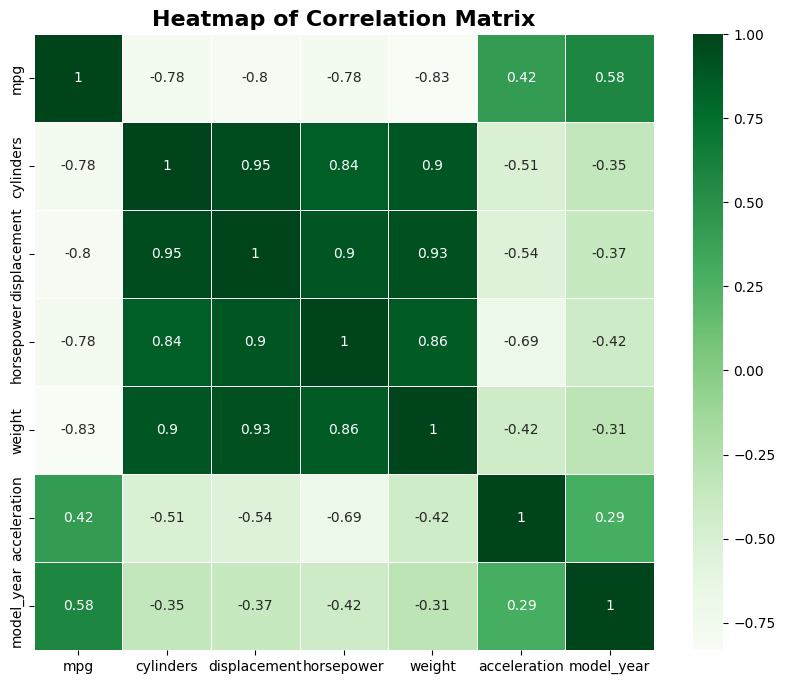

In [7]:
# 5)To visualize correlations, a heatmap plot can be used. Create a heatmap plot using the seaborn “heatmap” function. Try changing the color scale.
# Set up the figure and plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='Greens')
plt.title("Heatmap of Correlation Matrix", fontsize=16, fontweight='bold')
plt.show()

c:\Users\dilan\Documents\Github\DataAnalysis_and_AI\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\dilan\Documents\Github\DataAnalysis_and_AI\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\dilan\Documents\Github\DataAnalysis_and_AI\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\dilan\Documents\Github\DataAnalysis_and_AI\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\dilan\Documents\Github\DataAnalysis_and_AI\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` varia

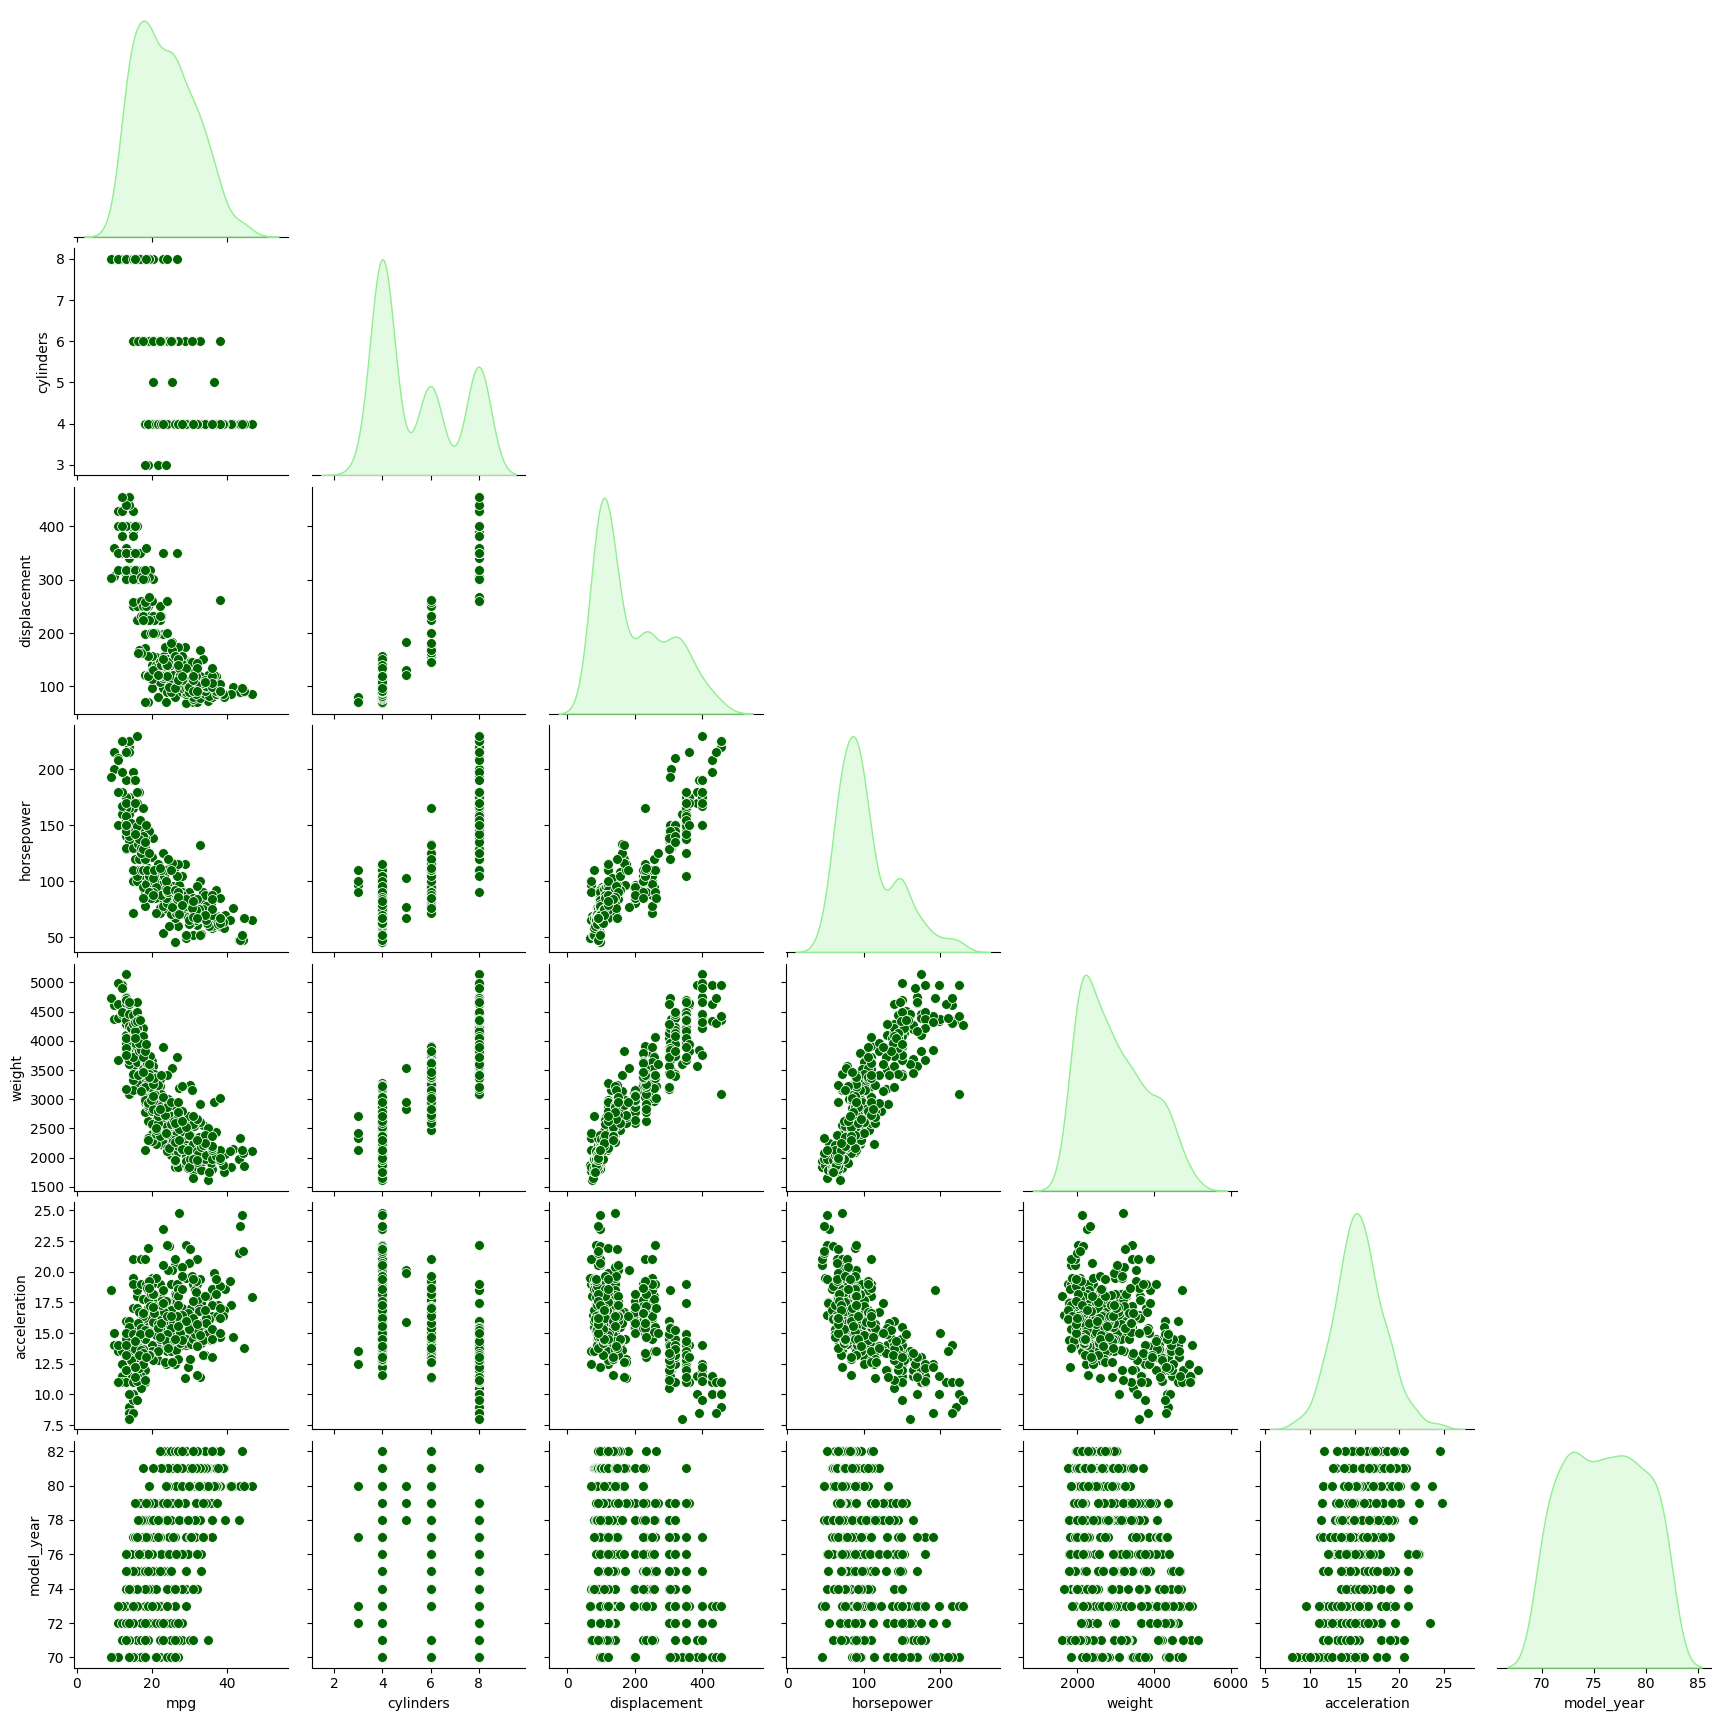

In [8]:
# 6) Create a correlogram figure using the pairplot function from seaborn. 
palette = sns.color_palette("Greens", n_colors=len(numeric_cols.columns))

# Create the pairplot with customizations
sns.pairplot(numeric_cols, 
             diag_kind='kde', 
             corner=True, 
             palette=palette,  # Set the color palette for scatter plots
             diag_kws={'color': 'lightgreen'},  # Set diagonal KDE plots to green
             plot_kws={'color': 'darkgreen', 's': 50}  # Set scatter plot points color and size
            )
# Display the plot
plt.show()


In [9]:
# What can you conclude? Which plot is more useful to display correlations?
print("En caso de querer una representación visual de la correlación entre variables, el correlograma es más útil que el heatmap, ya que muestra la relación entre todas las variables de manera más clara y detallada.")
print("Por otro lado el heatmap es útil para visualizar la correlación entre todas las variables de manera más general y rápida.")

En caso de querer una representación visual de la correlación entre variables, el correlograma es más útil que el heatmap, ya que muestra la relación entre todas las variables de manera más clara y detallada.
Por otro lado el heatmap es útil para visualizar la correlación entre todas las variables de manera más general y rápida.


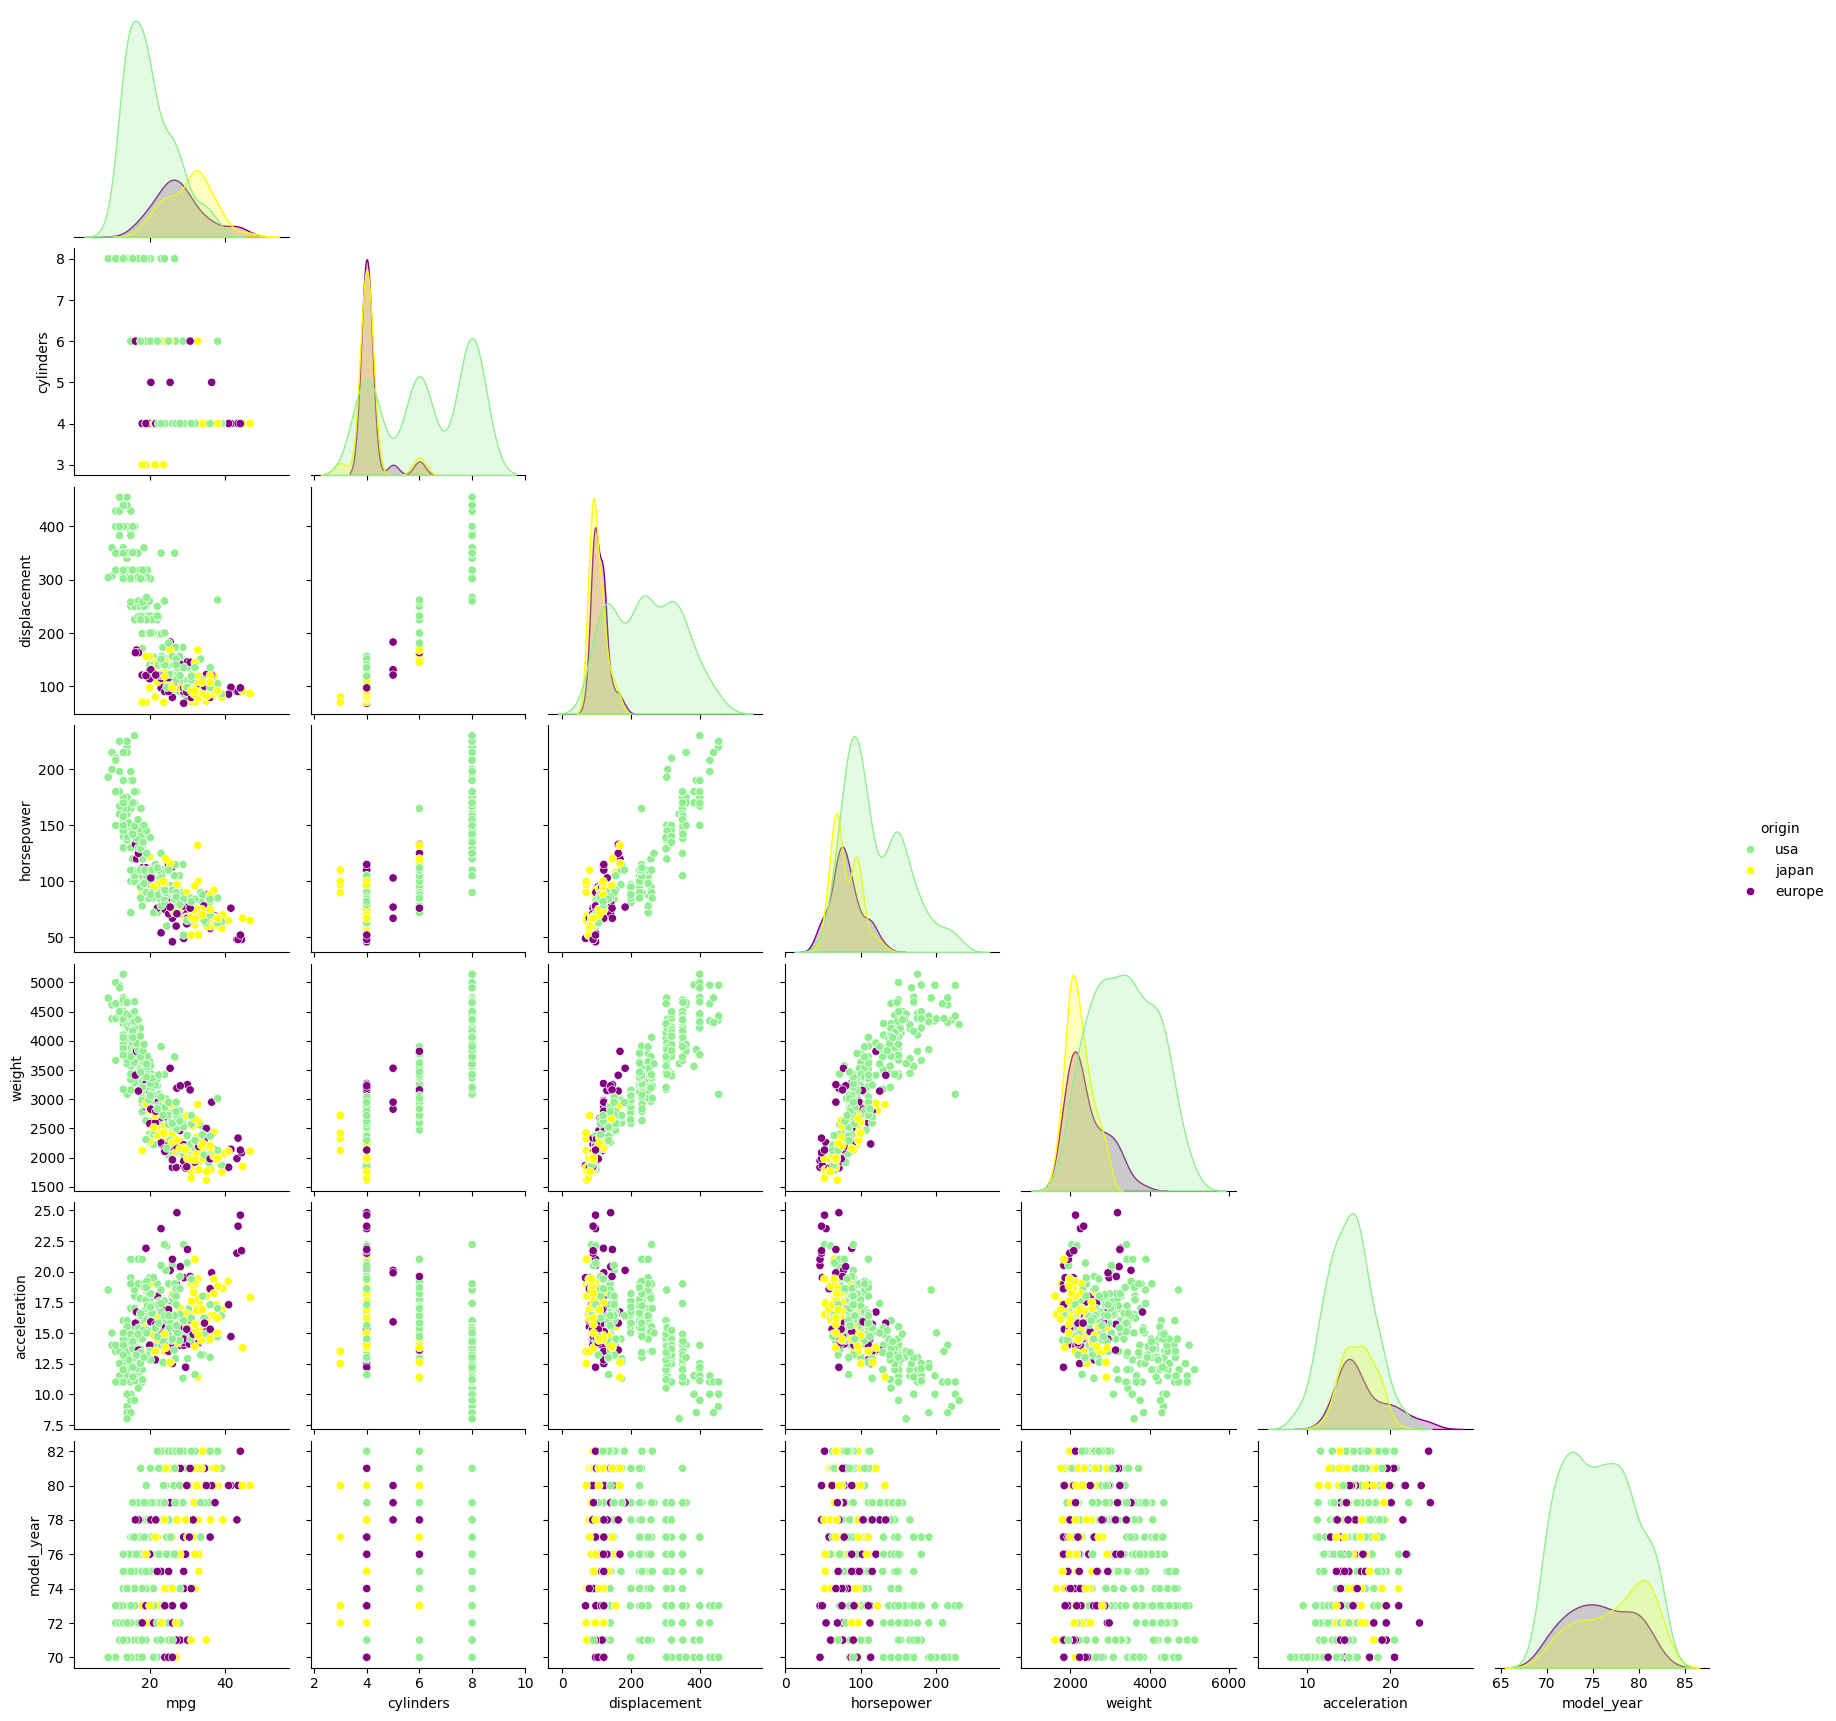

In [10]:
# 7) Modify the parameter “hue” in the pairplot plot using the column ‘origin’.

sns.pairplot(mpg_data, diag_kind='kde', corner=True, hue='origin', palette=['lightgreen', 'yellow', 'purple'])
plt.show()

In [11]:
# What can you conclude?
print("La funcion de pairplot es mas util para mostrar correlaciones ya que muestra todas las correlaciones posibles en un solo grafico")
print("Estas nuevas funciones que aprendi me ayudaran a visualizar mejor las correlaciones entre las variables de un dataset")

La funcion de pairplot es mas util para mostrar correlaciones ya que muestra todas las correlaciones posibles en un solo grafico
Estas nuevas funciones que aprendi me ayudaran a visualizar mejor las correlaciones entre las variables de un dataset
